**DISCLAIMER:** ALL THIS CODE IS TAKEN FROM **MY** GITHUB AT alchua1996@gmail.com. THIS IS MY PYTHON IMPLEMENTATION FROM BEFORE. I DON'T THINK THIS COUNTS AS PLAGIARISM SINCE I CITED MY OWN CODE.

# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
%matplotlib inline

In [ ]:
def L(r,j): #low pass
    if(2**j * r <= np.pi/2):
        out = 1
    elif(np.pi/2 <= 2**j * r <= np.pi):
        out = np.cos(np.pi/2 * np.log2(2* 2**(j) * r/np.pi))
    else:
        out = 0
    return out

def H(r,j): #high pass
    if(2**j * r <= np.pi/2):
        out = 0
    elif(np.pi/2 <= 2**j * r <= np.pi):
        out = np.cos(np.pi/2 * np.log2(2**(j) * r/np.pi))
    else:
        out = 1
    return out

def G_q(theta, Q,q): #directional cones
    alpha = 2**(Q - 1) * np.math.factorial(Q-1) / np.sqrt(Q*np.math.factorial(2*(Q-1)))
    r1 = theta - np.pi * q/Q
    if(r1 < -np.pi):
        r1 += 2*np.pi
    r2 = theta - np.pi * (q - Q)/Q
    if(r2 > np.pi):
        r2 -= 2*np.pi
    if(np.abs(r1) <= np.pi/2 and np.abs(r2) <= np.pi/2):
        out = np.cos(r1)**(Q-1) + np.cos(r2)**(Q-1)
    elif(np.abs(r1) <= np.pi/2 and np.abs(r2) > np.pi/2):
        out = np.cos(r1)**(Q-1)
    elif(np.abs(r1) > np.pi/2 and np.abs(r2) <= np.pi/2):
        out = np.cos(r2)**(Q-1)
    else:
        out = 0
    return alpha * out

In [ ]:
def polar_grid(sample_rate_x, sample_rate_y): 
    grid = np.zeros((sample_rate_x,sample_rate_y,2), dtype = 'float')
    x = np.linspace(-np.pi, np.pi, num=sample_rate_x, endpoint=False)
    y = np.linspace(-np.pi, np.pi, num=sample_rate_y, endpoint=False)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    rr = np.sqrt(xx**2 + yy**2)
    theta = np.arctan2(yy,xx)
    grid[:,:,0] = rr
    grid[:,:,1] = theta
    return grid 

In [ ]:
def L_grid(grid, j=0):
    N = grid.shape[0]
    M = grid.shape[1]
    L_matrix = np.zeros((N,M), dtype = 'float')
    for n in range(N):
        for m in range(M):
            L_matrix[n,m] = L(grid[n,m,0],j)
    return L_matrix

def H_grid(grid, j=0):
    N = grid.shape[0]
    M = grid.shape[1]
    H_matrix = np.zeros((N,M))
    for n in range(N):
        for m in range(M):
            H_matrix[n,m] = H(grid[n,m,0],j)
    return H_matrix

def G_grid(grid,Q):
    N = grid.shape[0]
    M = grid.shape[1]
    G_matrix = np.zeros((N,M,Q))
    for n in range(N):
        for m in range(M):
            for q in range(Q):
                G_matrix[n,m,q] = G_q(grid[n,m,1], Q, q)
    return G_matrix            

def psi_grid(grid, Q, J):
    N = grid.shape[0]
    M = grid.shape[1]
    psi_matrix = np.zeros((N,M,Q,J))
    G = G_grid(grid,Q)
    for j in range(J):
        L = L_grid(grid, j)
        H = H_grid(grid, j+1)
        for q in range(Q):
            psi_matrix[:,:,q,j] = G[:,:,q] * L * H     
    return psi_matrix

In [ ]:
def wavelet_pyramid(img, num_scales, num_orientations, high_pass, low_pass, psi):
    N,M = img.shape
    pyramid = np.zeros((N,M, num_scales*num_orientations + 2))
    img_fft = np.fft.fft2(img)
    pyramid[:,:,0] = np.abs(np.fft.ifft2(np.fft.fftshift(low_pass) * img_fft))
    pyramid[:,:,1] = np.abs(np.fft.ifft2(np.fft.fftshift(high_pass) * img_fft))
    count = 2
    for j in range(num_scales):
        for q in range(num_orientations):
            pyramid[:,:,count]= np.abs(np.fft.ifft2(np.fft.fftshift(psi[:,:,q,j]) * img_fft))
            count +=1
    return pyramid

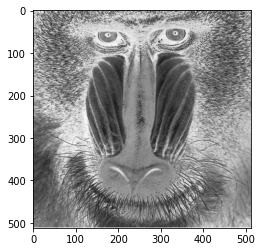

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/baboon.png')
plt.imshow(img, cmap='Greys')
plt.grid(False)

In [ ]:
scales = 2
orientations = 4
grid = polar_grid(512, 512)
low =  L_grid(grid, scales)
high = H_grid(grid, scales)
psi = psi_grid(grid, orientations, scales)

In [ ]:
wavelet_transform = wavelet_pyramid(img, 2, 4, high, low, psi)

Text(0.5, 0.98, 'Directional Filters (numpy)')

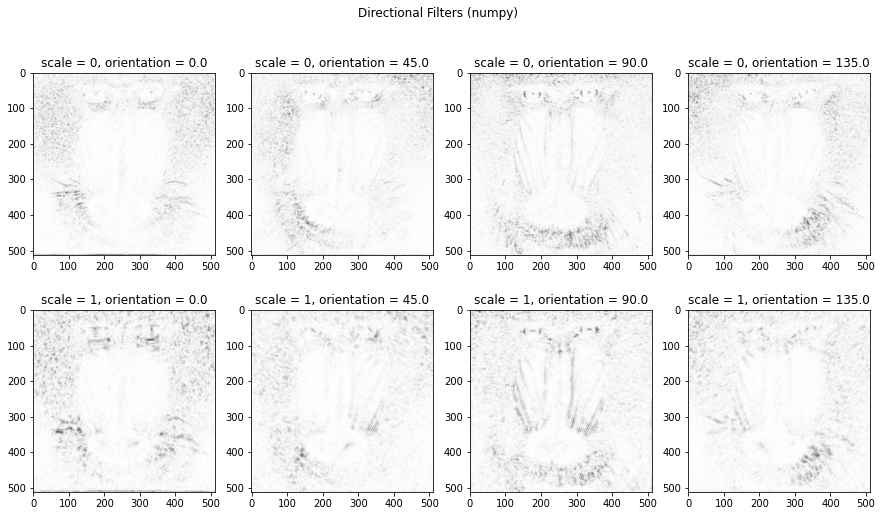

In [ ]:
count = 2
plt.figure(figsize = (15, 8))
for n in range(scales):
    for m in range(orientations):
        plt.subplot(scales, orientations, count-1)
        plt.imshow(np.abs(wavelet_transform[:,:,count]), cmap = 'Greys')
        plt.title('scale = {}, orientation = {}'.format(n, m*180/orientations))
        count += 1
plt.suptitle('Directional Filters (numpy)')

Text(0.5, 1.0, 'High Pass (numpy)')

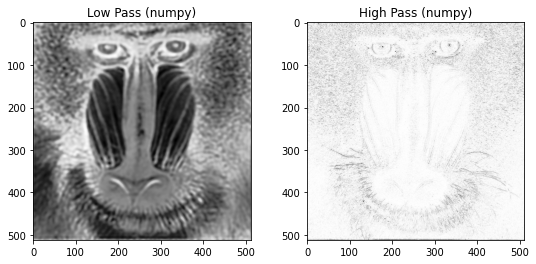

In [ ]:
plt.figure(figsize = (9, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(wavelet_transform[:,:,0]), cmap = 'Greys')
plt.title('Low Pass (numpy)')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(wavelet_transform[:,:,1]), cmap = 'Greys')
plt.title('High Pass (numpy)')